In [43]:
import urllib3
www = urllib3.PoolManager().request('GET','https://en.wikipedia.org/w/index.php?title=Proteinogenic_amino_acid')

In [44]:
from bs4 import BeautifulSoup
page = BeautifulSoup(www.data,"html.parser")

In [48]:
print(page.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Proteinogenic amino acid - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Proteinogenic_amino_acid","wgTitle":"Proteinogenic amino acid","wgCurRevisionId":776951374,"wgRevisionId":776951374,"wgArticleId":427499,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category with local link different than on Wikidata","Proteinogenic amino acids","Nitrogen cycle","Nutrition"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""

In [118]:
table=page.find_all('table',{"class":'wikitable sortable'})
print(table[3])

<table class="wikitable sortable" style="text-align: center">
<tr>
<th>Amino Acid</th>
<th>Short</th>
<th>Abbrev.</th>
<th>Formula</th>
<th>Mon. Mass<a href="#monmassnote">§</a> (<a class="mw-redirect" href="/wiki/Atomic_mass_unit" title="Atomic mass unit">Da</a>)</th>
<th>Avg. Mass (<a class="mw-redirect" href="/wiki/Atomic_mass_unit" title="Atomic mass unit">Da</a>)</th>
</tr>
<tr>
<th><a href="/wiki/Alanine" title="Alanine">Alanine</a></th>
<td>A</td>
<td>Ala</td>
<td>C<sub>3</sub>H<sub>5</sub>NO</td>
<td>71.03711</td>
<td>71.0779</td>
</tr>
<tr>
<th><a href="/wiki/Cysteine" title="Cysteine">Cysteine</a></th>
<td>C</td>
<td>Cys</td>
<td>C<sub>3</sub>H<sub>5</sub>NOS</td>
<td>103.00919</td>
<td>103.1429</td>
</tr>
<tr>
<th><a href="/wiki/Aspartic_acid" title="Aspartic acid">Aspartic acid</a></th>
<td>D</td>
<td>Asp</td>
<td>C<sub>4</sub>H<sub>5</sub>NO<sub>3</sub></td>
<td>115.02694</td>
<td>115.0874</td>
</tr>
<tr>
<th><a href="/wiki/Glutamic_acid" title="Glutamic acid">Glutamic aci

In [114]:
table[3].find_all("tr")
for i, row in enumerate(table[3].findAll("tr")):
    cells = row.findAll("td")
    print(i, len(cells))

0 0
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
19 5
20 5
21 5
22 5


In [156]:
aa = [ ]
mm = [ ]
for row in table[3].findAll("tr"):
    cells = row.findAll("td")
    if len(cells) == 5:
        aa.append(cells[0].findAll(text = True)[0])
        mm.append(float(cells[3].findAll(text = True)[0]))
print(aa,mm)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y'] [71.03711, 103.00919, 115.02694, 129.04259, 147.06841, 57.02146, 137.05891, 113.08406, 128.09496, 113.08406, 131.04049, 114.04293, 237.14773, 97.05276, 128.05858, 156.10111, 87.03203, 101.04768, 150.95364, 99.06841, 186.07931, 163.06333]


In [172]:
import pandas as pd
aamm=pd.DataFrame(data=[aa, mm]).transpose()
aamm.columns = ['Short', 'Mon. Mass§ (Da)']
aamm['Mon. Mass§ (Da)'] = aamm['Mon. Mass§ (Da)']
aamm

,Short,Mon. Mass§ (Da)
0,A,71.0371
1,C,103.009
2,D,115.027
3,E,129.043
4,F,147.068
5,G,57.0215
6,H,137.059
7,I,113.084
8,K,128.095
9,L,113.084


In [119]:
#https://en.wikipedia.org/wiki/De_novo_peptide_sequencing
mmH2O = 18.01056
mmProton = 1.00728

In [173]:
pep='GLSDGEWQQVLNVWGK'
#http://www.ionsource.com/tutorial/DeNovo/b_and_y.htm
#pep='MIGQK'
tMass=0.0;
bIon=0.0;
bIon_list = []
yIon_list = []
pep_list = []
for b in range(0,len(pep)):
    pep_list.append(pep[b])
    tMass=tMass+aamm[aamm['Short']==pep[b]]['Mon. Mass§ (Da)'].values;
    bIon=bIon+aamm[aamm['Short']==pep[b]]['Mon. Mass§ (Da)'].values[0];
    bIon_list.append(bIon+mmProton)
    yIon=0.0;
    for y in range(b,len(pep)):
        yIon=yIon+aamm[aamm['Short']==pep[y]]['Mon. Mass§ (Da)'].values[0];
    yIon_list.append(yIon+mmH2O+mmProton)
print(pep_list,bIon_list,yIon_list,tMass+mmH2O)

['G', 'L', 'S', 'D', 'G', 'E', 'W', 'Q', 'Q', 'V', 'L', 'N', 'V', 'W', 'G', 'K'] [58.02874, 171.1128, 258.14482999999996, 373.17177, 430.19322999999997, 559.23582, 745.31513, 873.37371, 1001.43229, 1100.5007, 1213.58476, 1327.62769, 1426.6961000000001, 1612.7754100000002, 1669.7968700000001, 1797.89183] [1815.90239, 1758.8809299999998, 1645.79687, 1558.76484, 1443.7378999999999, 1386.7164399999997, 1257.6738499999997, 1071.5945399999998, 943.5359600000002, 815.4773800000002, 716.4089700000001, 603.32491, 489.28198, 390.21356999999995, 204.13425999999998, 147.1128] [1814.89511]


([<matplotlib.axis.XTick at 0x7f80e1266f60>,
 <a list of 16 Text xticklabel objects>)

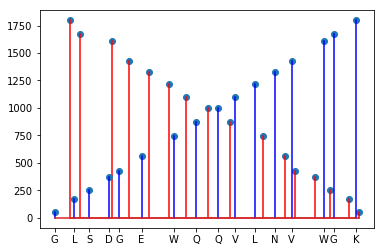

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.stem(yIon_list,bIon_list,'r')
plt.stem(bIon_list,bIon_list,'b')
plt.xticks(bIon_list, pep_list)